#  Import Libraries

In [43]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# load the data set

In [69]:

# Load your local CSV file (you already downloaded it)
df = pd.read_csv(r"C:\Users\SURA\Downloads\Iris.csv")

# If needed, drop ID column (optional, if it exists)
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Show the first few rows
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Encoded the species to 0 , 1 , 2

In [74]:
# Map strings to numbers (if needed)
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species_encoded'] = df['Species'].map(species_mapping)
pd.concat([df.head(), df.iloc[[74]], df.tail()])  # Row 74 + head & tail

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
74,6.4,2.9,4.3,1.3,Iris-versicolor,1
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


 # spliting the data set for 

In [67]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species_encoded']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)



RandomForestClassifier()

# Understanding basic classification concepts I use on Iris flower data set

In [60]:
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd

# Get model params
params = model.get_params()

# Explanation dictionary for key parameters
explanations = {
    'bootstrap': "Whether bootstrap samples are used when building trees (True = yes)",
    'ccp_alpha': "Complexity parameter for minimal cost-complexity pruning",
    'class_weight': "Weights associated with classes to handle imbalance (None = equal weights)",
    'criterion': "Function to measure split quality ('gini' = Gini impurity)",
    'max_depth': "Max depth of each tree (None means no limit)",
    'max_features': "Number of features considered for splitting at each node",
    'max_leaf_nodes': "Max leaf nodes in each tree (None means unlimited)",
    'min_samples_leaf': "Minimum samples required at a leaf node",
    'min_samples_split': "Minimum samples needed to split a node",
    'n_estimators': "Number of trees in the forest",
    'random_state': "Seed for random number generator (None = random each run)",
    'oob_score': "Whether to use out-of-bag samples to estimate accuracy",
}

print("Model Parameters and Explanations:\n")
for param, explanation in explanations.items():
    value = params.get(param, "N/A")
    print(f"{param:<20} = {str(value):<10} --> {explanation}")


Model Parameters and Explanations:

bootstrap            = True       --> Whether bootstrap samples are used when building trees (True = yes)
ccp_alpha            = 0.0        --> Complexity parameter for minimal cost-complexity pruning
class_weight         = None       --> Weights associated with classes to handle imbalance (None = equal weights)
criterion            = gini       --> Function to measure split quality ('gini' = Gini impurity)
max_depth            = None       --> Max depth of each tree (None means no limit)
max_features         = sqrt       --> Number of features considered for splitting at each node
max_leaf_nodes       = None       --> Max leaf nodes in each tree (None means unlimited)
min_samples_leaf     = 1          --> Minimum samples required at a leaf node
min_samples_split    = 2          --> Minimum samples needed to split a node
n_estimators         = 100        --> Number of trees in the forest
random_state         = None       --> Seed for random number ge

# Feature importance plot

C:\Users\SURA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


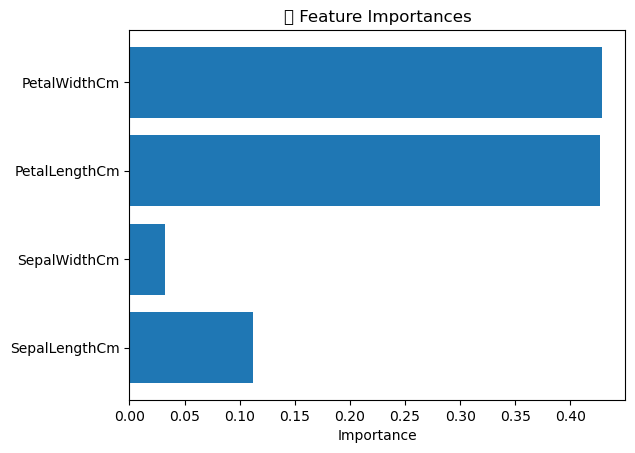

In [59]:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.title("🌟 Feature Importances")
plt.show()

# explaining how the model(Random Forest) makes its decisions — step by step

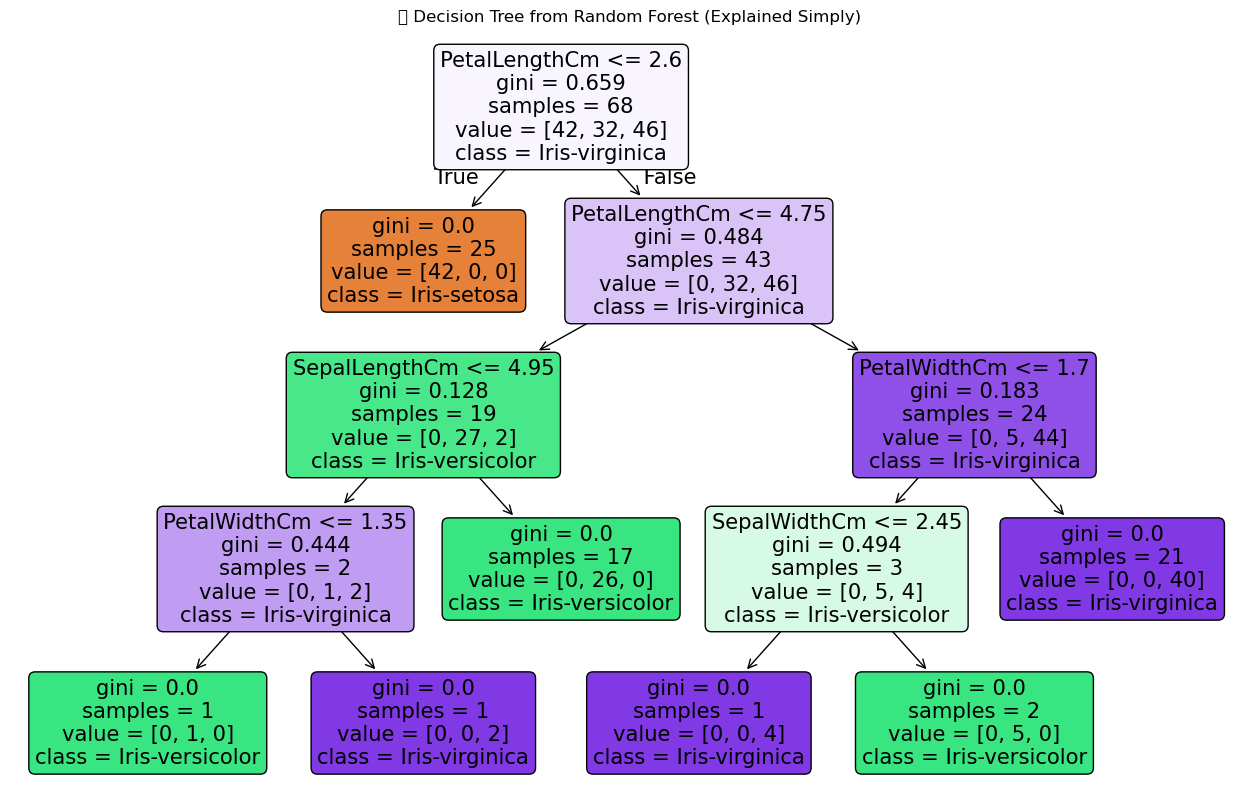


🧠 What You’re Seeing 
------------------------------------------------
👉 This is a Decision Tree — a flowchart the model uses to classify flowers.
👉 Each box is a question like: 'Is PetalLengthCm ≤ 2.45?'
👉 The tree asks these questions step-by-step until it reaches a final decision.
👉 At the end of each path, it picks a class (like Iris-setosa 🌸).
👉 'samples' = number of flower examples that reached this point.
👉 'gini' = how pure that decision is (0 = very sure, 0.5 = unsure).
👉 'class' = the flower species it predicts at that point.

🌿 This helps us explain how the model makes its decisions — step by step.


In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define class names manually if not using LabelEncoder
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Plot the first decision tree from the Random Forest
plt.figure(figsize=(16, 10))
plot_tree(
    model.estimators_[1],            # You can change to [0], [1], etc.
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.title("📊 Decision Tree from Random Forest (Explained Simply)")
plt.show()

# Beginner-Friendly Explanation
print("\n🧠 What You’re Seeing ")
print("------------------------------------------------")
print("👉 This is a Decision Tree — a flowchart the model uses to classify flowers.")
print("👉 Each box is a question like: 'Is PetalLengthCm ≤ 2.45?'")
print("👉 The tree asks these questions step-by-step until it reaches a final decision.")
print("👉 At the end of each path, it picks a class (like Iris-setosa 🌸).")
print("👉 'samples' = number of flower examples that reached this point.")
print("👉 'gini' = how pure that decision is (0 = very sure, 0.5 = unsure).")
print("👉 'class' = the flower species it predicts at that point.\n")
print("🌿 This helps us explain how the model makes its decisions — step by step.")


# Predict a single  random sample using the model

In [58]:
# Pick one sample from the test set
sample = X_test.iloc[0]
true_label = y_test.iloc[0]

# Predict using the model (fix shape using DataFrame)
predicted_label = model.predict(pd.DataFrame([sample], columns=X.columns))[0]

# Try decoding if LabelEncoder is available
try:
    true_species = le.inverse_transform([true_label])[0]
    predicted_species = le.inverse_transform([predicted_label])[0]
except:
    true_species = f"Encoded: {true_label}"
    predicted_species = f"Encoded: {predicted_label}"

# Print everything clearly
print("🌸 Predicting a Single Iris Sample 🌸\n")
print("📏 Features:")
print(sample)

print("\n✅ True Species:      ", true_species)
print("🔮 Predicted Species: ", predicted_species)
print("\n✔️ Match:", "Yes ✅" if true_label == predicted_label else "No ❌")


🌸 Predicting a Single Iris Sample 🌸

📏 Features:
SepalLengthCm    6.1
SepalWidthCm     2.8
PetalLengthCm    4.7
PetalWidthCm     1.2
Name: 73, dtype: float64

✅ True Species:       Encoded: 1
🔮 Predicted Species:  Encoded: 1

✔️ Match: Yes ✅


# Evaluate the model’s accuracy 

In [63]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


# performance

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

